# Example 

This short notebook aims to show how the main part of the code work and how to reproduce similar score to those published in : https://arxiv.org/pdf/2206.01417

Please cite for the main method : 
```
@inproceedings{risser2021learning,
  title={Learning an adaptation function to assess image visual similarities},
  author={Risser-Maroix, Olivier and Kurtz, Camille and Lomenie, Nicolas},
  booktitle={2021 IEEE International Conference on Image Processing (ICIP)},
  pages={2498--2502},
  year={2021},
  organization={IEEE}
}
```

The extended version contains better scores by benchmarking 37 pretrained features extractors :
```
@article{risser2022learning,
  title={Learning an Adaptation Function to Assess Image Visual Similarities},
  author={Risser-Maroix, Olivier and Marzouki, Amine and Djeghim, Hala and Kurtz, Camille and Lomenie, Nicolas},
  journal={arXiv preprint arXiv:2206.01417},
  year={2022}
}
```


## Run the training from the pretrained features checkpoints

If already computed, this will be passed and not computer again…

Please refer to the `argparse` for details of the command.

This following command will run for only 50 epochs the feature adaptation proposed in `risser2021learning` on *clip_rn50x4* features compressed in 256 dims. Feel free to train longer (and use the --gpu option) ! :D

In [1]:
!python train.py -d saved_features/AdaptationProcessor/clip_rn50x4/clip_rn50x4_with_pca_256.npy --model original -s example_runs -e 50 -r 20 -t 15 --test-split 0.25 -k 1 3 5 

temp  15
Found directory with the with the same saved name ! Will not perform training.


You can launch tensorboard for monitoring with :

`tensorboard --logdir example_runs --port=6006`

Then open a web-browser at : `http://localhost:6006`

You should get something like : 

![tensorboard example](./example_tensorboard.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
d = np.load("example_runs/avg_of_all_runs.npy", allow_pickle=True).reshape(-1)[0]
d.keys()

dict_keys(['Train/Loss', 'Train/top 1', 'Train/top 3', 'Train/top 5', 'Test/Loss', 'Test/top 1', 'Test/top 3', 'Test/top 5'])

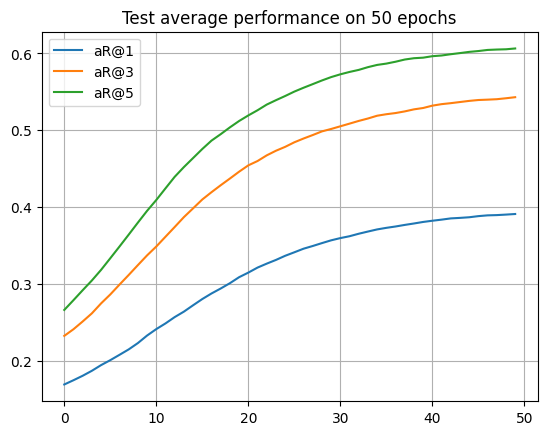

In [4]:
plt.title(f"Test average performance on {len(d['Test/top 1'])} epochs")
plt.plot(d["Test/top 1"], label="aR@1")
plt.plot(d["Test/top 3"], label="aR@3")
plt.plot(d["Test/top 5"], label="aR@5")
plt.grid()
plt.legend()
plt.show()

## TLL_obj split

As explained in the paper we used a subset of TLL named TLL_obj containing less faces… 

Do you wan compare with us ? you can use the exact same subset, here are the names of the images to keep : 

In [5]:
import pandas as pd

L = np.load("saved_features/AdaptationProcessor/clip_rn50x4/clip_rn50x4_with_pca_256.npy", allow_pickle=True).reshape(-1)[0]["left_name"]

In [6]:
df = pd.DataFrame()
df["TLL_obj"] = L

In [7]:
df

,TLL_obj
0,00001.jpg
1,00002.jpg
2,00004.jpg
3,00005.jpg
4,00007.jpg
...,...
8393,06006.jpg
8394,06009.jpg
8395,06012.jpg
8396,06013.jpg


In [8]:
df.to_csv("TLL_obj.csv")